# Exploratory Data Analysis(EDA) tools and examples on FER 2013 dataset for face expressions

### EDA plays a crucial role in understanding its structure and insights.

Image dataset that consists of different emotions (like happy, sad, cry, neutral, and surprised), EDA (Exploratory Data Analysis) can help in gaining initial insights about the data.

##EDA tools to examine datasets, identify patterns, and prepare data for modeling:
1. Pandas: Used for data manipulation, loading, and cleaning.
2. Matplotlib/Seaborn: Used for visualizing data distributions.
3. NumPy: Useful for handling numeric data efficiently, especially with pixel data in images.

## EDA Examples:  Some examples of EDA tasks that can be performed for this dataset:

1. Contrast analysis
2. Pixel Intensity Distribution
3. Edge Detection for Visual Patterns
4. Feature pixel patterns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Assess structure and distribution

In [ ]:
import os

# Define the path to the dataset
dataset_dir = '/content/drive/My Drive/dataset'

# Example paths for train and test directories
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

# Check if the directories are correctly accessed
print("We can see different folders with different emotions.")
print("Train folder contents:", os.listdir(train_dir))
print("Test folder contents:", os.listdir(test_dir))


We can see different folders with different emotions.
Train folder contents: ['neutral', 'sad', 'angry', 'surprised', 'happy']
Test folder contents: ['happy', 'angry', 'sad', 'neutral', 'surprised']


In [ ]:
# List contents of each emotion subfolder
emotions = ['happy', 'sad', 'angry', 'neutral', 'surprised']

for emotion in emotions:
    emotion_path = os.path.join(train_dir, emotion)
    print(f"Number of images in {emotion} (train):", len(os.listdir(emotion_path)))

print("\n")

for emotion in emotions:
    emotion_path = os.path.join(test_dir, emotion)
    print(f"Number of images in {emotion} (test):", len(os.listdir(emotion_path)))


Number of images in happy (train): 35
Number of images in sad (train): 45
Number of images in angry (train): 35
Number of images in neutral (train): 35
Number of images in surprised (train): 35


Number of images in happy (test): 35
Number of images in sad (test): 35
Number of images in angry (test): 30
Number of images in neutral (test): 35
Number of images in surprised (test): 35


# 2. Visualize class distribution:

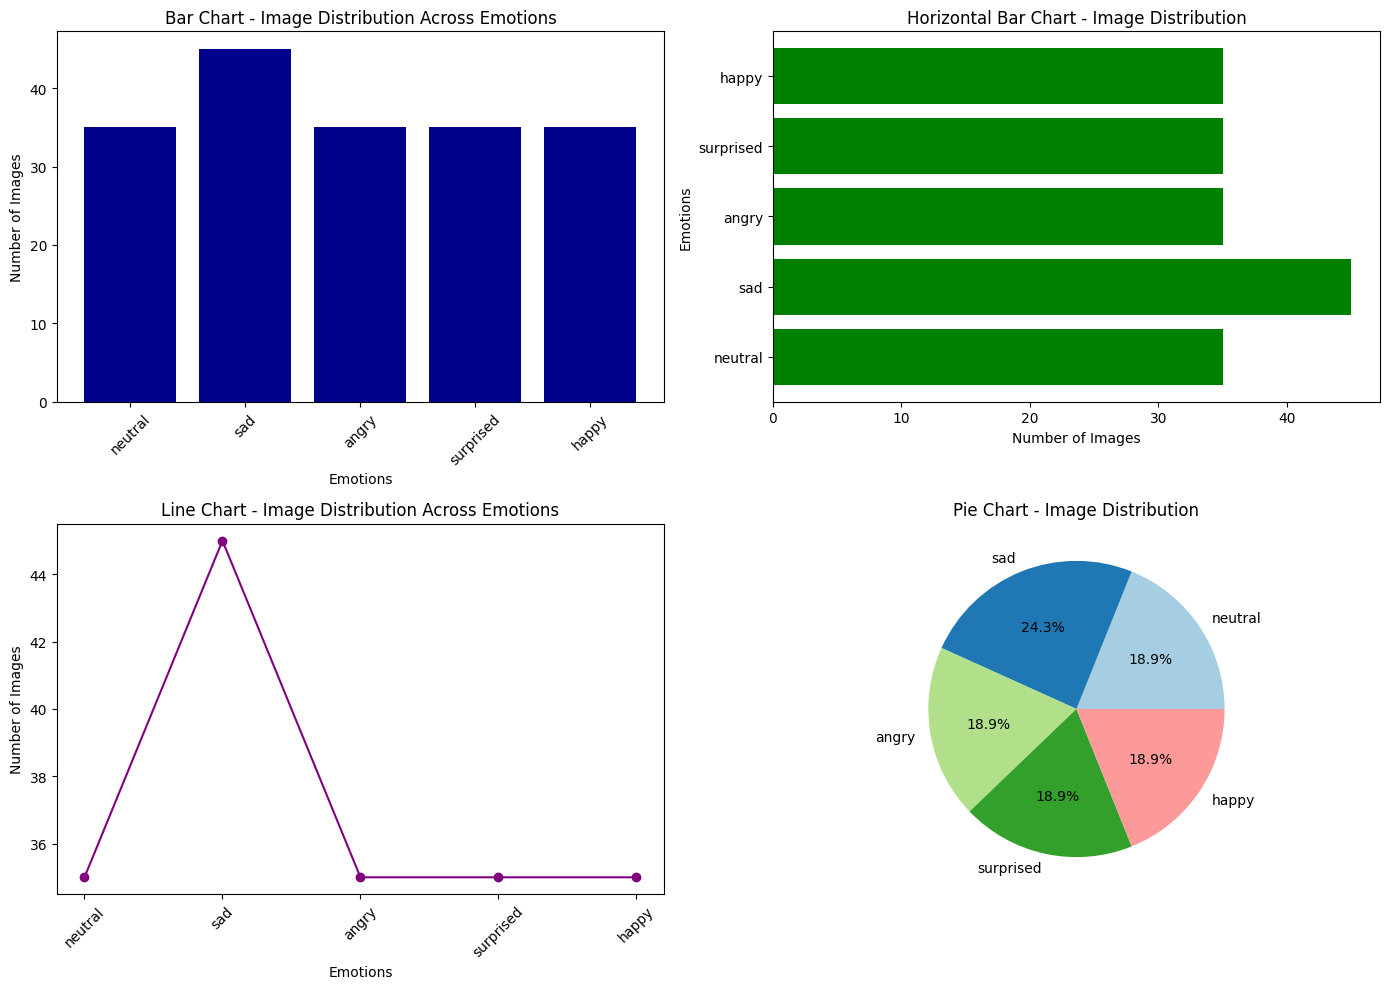

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import os

# Function to count images in each category
def count_images(directory):
    counts = {}
    for emotion in os.listdir(directory):
        emotion_path = os.path.join(directory, emotion)
        if os.path.isdir(emotion_path):
            counts[emotion] = len(os.listdir(emotion_path))
    return counts

# Count images in train and test sets
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

# Create a figure with 3 subplots: 2x2 grid, leaving one blank
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Subplot 1: Bar Chart
axs[0, 0].bar(train_counts.keys(), train_counts.values(), color='darkblue')
axs[0, 0].set_title('Bar Chart - Image Distribution Across Emotions')
axs[0, 0].set_xlabel('Emotions')
axs[0, 0].set_ylabel('Number of Images')
axs[0, 0].tick_params(axis='x', rotation=45)

# Subplot 2: Horizontal Bar Chart
axs[0, 1].barh(list(train_counts.keys()), train_counts.values(), color='green')
axs[0, 1].set_title('Horizontal Bar Chart - Image Distribution')
axs[0, 1].set_xlabel('Number of Images')
axs[0, 1].set_ylabel('Emotions')

# Subplot 3: Line Chart
axs[1, 0].plot(list(train_counts.keys()), train_counts.values(), marker='o', linestyle='-', color='purple')
axs[1, 0].set_title('Line Chart - Image Distribution Across Emotions')
axs[1, 0].set_xlabel('Emotions')
axs[1, 0].set_ylabel('Number of Images')
axs[1, 0].tick_params(axis='x', rotation=45)

# Subplot 4: Pie Chart
axs[1, 1].pie(train_counts.values(), labels=train_counts.keys(), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axs[1, 1].set_title('Pie Chart - Image Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# Prepare data for Plotly
data = []

for emotion, count in train_counts.items():
    data.append({'Emotion': emotion, 'Count': count, 'Set': 'Train'})

for emotion, count in test_counts.items():
    data.append({'Emotion': emotion, 'Count': count, 'Set': 'Test'})

df_plotly = pd.DataFrame(data)

# Create an interactive bar chart
fig = px.bar(df_plotly, x='Emotion', y='Count', color='Set',
             title='Class Distribution in Training and Test Sets',
             labels={'Count': 'Number of Images', 'Emotion': 'Emotion Categories'},
             barmode='group')

fig.show()


Image classification:


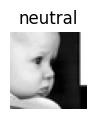

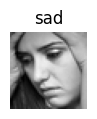

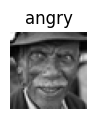

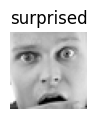

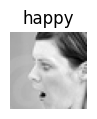

In [ ]:
import random
import matplotlib.pyplot as plt
import cv2

print("Image classification:")

def display_sample_images(directory, emotion, num_images=1):
    folder_path = os.path.join(directory, emotion)
    image_files = random.sample(os.listdir(folder_path), num_images)

    plt.figure(figsize=(1,1))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(emotion)
    plt.show()

# Display sample images from each emotion
for emotion in train_counts.keys():
    display_sample_images(train_dir, emotion, num_images=1)


# 3. Check Image Consistency

In [ ]:
def check_image_dimensions(directory):
    dimensions = {}
    for emotion in os.listdir(directory):
        folder_path = os.path.join(directory, emotion)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            height, width = img.shape
            dimensions[emotion] = dimensions.get(emotion, []) + [(height, width)]

    return dimensions

image_dimensions = check_image_dimensions(train_dir)
print(image_dimensions)


{'neutral': [(48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48)], 'sad': [(48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48)], 'angry': [(48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48), (48, 48

# 4. Preprocess Data

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def preprocess_images(directory, target_size=(48, 48)):
    images = []
    labels = []
    for emotion in os.listdir(directory):
        folder_path = os.path.join(directory, emotion)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = load_img(img_path, target_size=target_size, color_mode='grayscale')
            img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
            images.append(img_array)
            labels.append(emotion)
    return images, labels

train_images, train_labels = preprocess_images(train_dir)
print(f"Processed {len(train_images)} images.")


Processed 185 images.


# 5. Augment Data

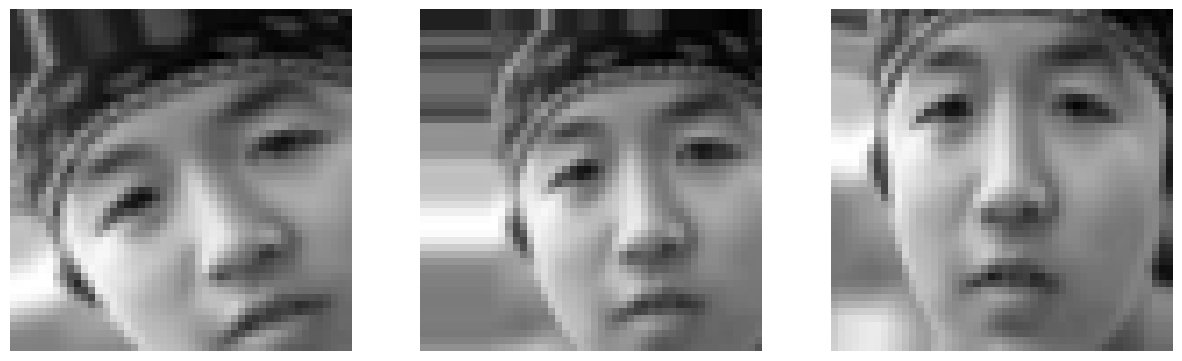

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example of augmenting a single image
sample_image = train_images[0]
sample_image = sample_image.reshape((1,) + sample_image.shape)  # Reshape for generator

# Create a figure with subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 3 images side by side

i = 0
for batch in datagen.flow(sample_image, batch_size=1):
    # Display the augmented image in a subplot
    axes[i].imshow(batch[0], cmap='gray')
    axes[i].axis('off')
    i += 1
    if i >= 3:  # Generate 3 augmented images
        break

plt.show()

### Data Augmentation

# Additional steps can be done with PCA for image dimensions:

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define paths
train_dir = '/content/drive/My Drive/dataset/train'

# Function to load and flatten images
def load_images(directory):
    images = []
    labels = []
    categories = os.listdir(directory)

    for category in categories:
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img = img.resize((64, 64))  # Resize to a fixed size
                img_array = np.asarray(img).flatten()  # Flatten the image into a vector
                images.append(img_array)
                labels.append(category)

    return np.array(images), np.array(labels)

# Load images from the train directory
X, y = load_images(train_dir)

print("Check shape (number of images, pixels per image")
print("Image Data Shape:", X.shape)  # Check shape (number of images, pixels per image)


Check shape (number of images, pixels per image
Image Data Shape: (185, 4096)


Explained Variance by 50 components: 91.50%


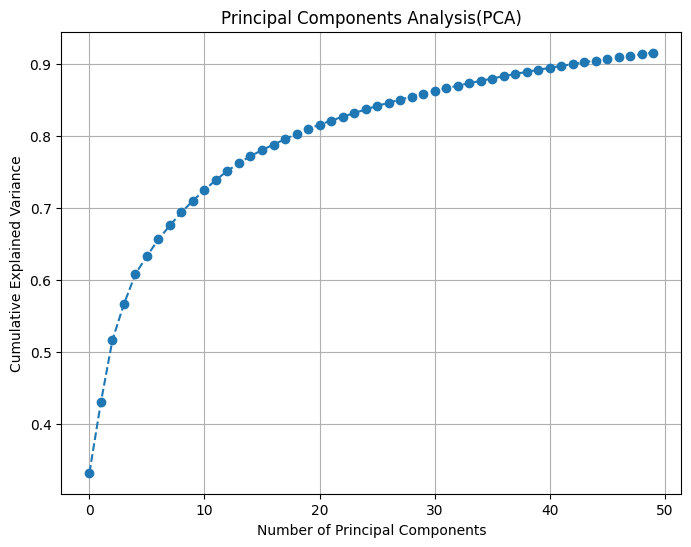

In [ ]:
# Apply PCA
n_components = 50  # Number of principal components to keep (you can experiment with this value)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

print(f"Explained Variance by {n_components} components: {explained_variance[-1]*100:.2f}%")

# Visualize the explained variance
plt.figure(figsize=(8,6))
plt.plot(explained_variance, marker='o', linestyle='--')
plt.title('Principal Components Analysis(PCA)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


### capturing 91.50% of the variance with 50 components is a strong outcome that likely enhances the quality and efficiency of subsequent analyses.

# EDA Examples on Image Dataset

## Contrast analysis:

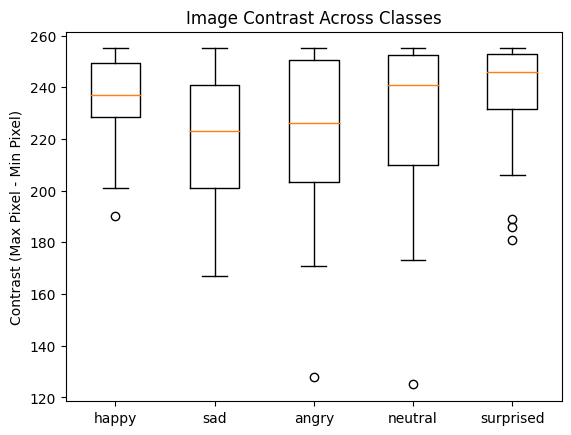

In [ ]:
def get_contrast(image_path):
    img = Image.open(image_path).convert('L')
    np_img = np.array(img)
    contrast = np.max(np_img) - np.min(np_img)  # Contrast = max intensity - min intensity
    return contrast

contrasts = {category: [] for category in categories}
for category in categories:
    folder_path = os.path.join(train_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        contrasts[category].append(get_contrast(img_path))

# Plotting contrast distributions
plt.boxplot([contrasts[category] for category in categories], labels=categories)
plt.title('Image Contrast Across Classes')
plt.ylabel('Contrast (Max Pixel - Min Pixel)')
plt.show()


### We have very less outliers which indicate poor brightness and exposure. Overall, all classes show a positive skewness, indicating that the distributions have longer tails on the right side.

# Pixel Intensity Distribution

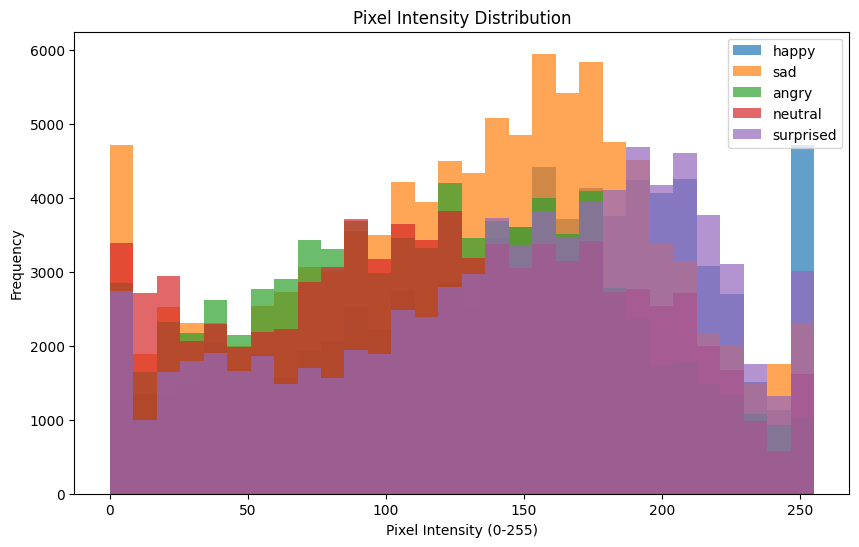

In [ ]:
def get_pixel_intensity_distribution(image_path):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale if not already
    np_img = np.array(img)
    return np_img.flatten()  # Flatten the 2D image into a 1D array

intensity_distributions = {category: [] for category in categories}
for category in categories:
    folder_path = os.path.join(train_dir, category)
    for img_name in os.listdir(folder_path)[:50]:  # Sampling 50 images for quick analysis
        img_path = os.path.join(folder_path, img_name)
        intensity_distributions[category].extend(get_pixel_intensity_distribution(img_path))

# Plotting intensity distributions
plt.figure(figsize=(10, 6))
for category in categories:
    plt.hist(intensity_distributions[category], bins=30, alpha=0.7, label=category)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### provides insight into the overall lighting and pixel brightness levels for each emotion. Classes like "neutral" and "sad" tend to have darker pixel distributions, while "happy" and "surprised" contain more bright regions.

# Edge Detection for Visual Patterns:

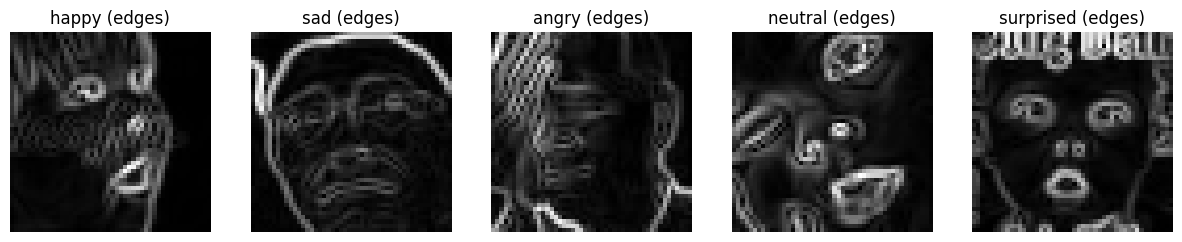

In [ ]:
from skimage import filters

fig, axes = plt.subplots(1, len(categories), figsize=(15, 5))

for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    random_img = random.choice(os.listdir(folder_path))
    img = Image.open(os.path.join(folder_path, random_img)).convert('L')
    edges = filters.sobel(np.array(img))  # Sobel edge detection
    axes[i].imshow(edges, cmap='gray')
    axes[i].set_title(f'{category} (edges)')
    axes[i].axis('off')

plt.show()


### Identified landmarks on face, eyes, nose, lips.

# Feature pixel patterns:

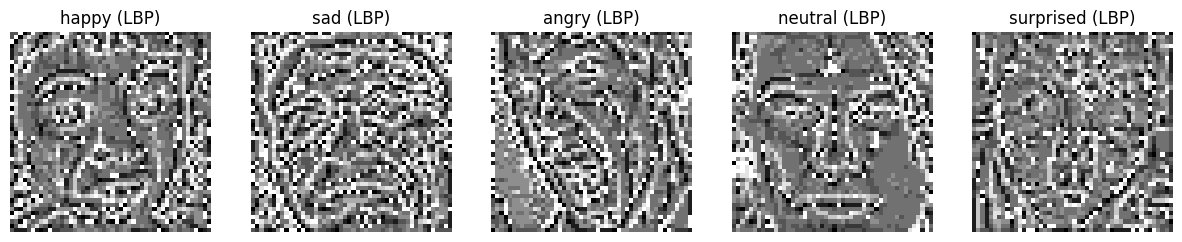

In [ ]:
from skimage.feature import local_binary_pattern

fig, axes = plt.subplots(1, len(categories), figsize=(15, 5))

for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    random_img = random.choice(os.listdir(folder_path))
    img = Image.open(os.path.join(folder_path, random_img)).convert('L')
    lbp = local_binary_pattern(np.array(img), P=8, R=1, method='uniform')  # LBP with 8 neighbors
    axes[i].imshow(lbp, cmap='gray')
    axes[i].set_title(f'{category} (LBP)')
    axes[i].axis('off')

plt.show()


### By analyzing the patterns of pixels across different emotions, you can see if certain facial regions show distinct intensity changes for particular expressions.

# Summary of EDA Steps:
Explore and Understand Dataset:
1. Assess structure and distribution: Different folders with different emotions
2. Visualize Data: plots to understand class balance and sample images.
3. Check Image Consistency: Verify dimensions and file types.
4. Preprocess Data: Normalize and resize images.
5. Augment Data: Enhance the dataset to improve model performance.

Performing Different EDA examples to understand different patterns on:

1. Contrast analysis
2. Pixel Intensity Distribution
3. Edge Detection for Visual Patterns
4. Feature pixel patterns

dataset displays a diverse range of contrast and pixel intensity levels across various facial expressions. Classes like "happy" and "surprised" tend to have brighter, well-lit images, while "sad" and "neutral" contain more shadowed areas. The dataset's skew toward darker pixels and some low-contrast images highlight the need for preprocessing techniques, such as contrast enhancement, to improve its suitability for facial expression recognition models.



